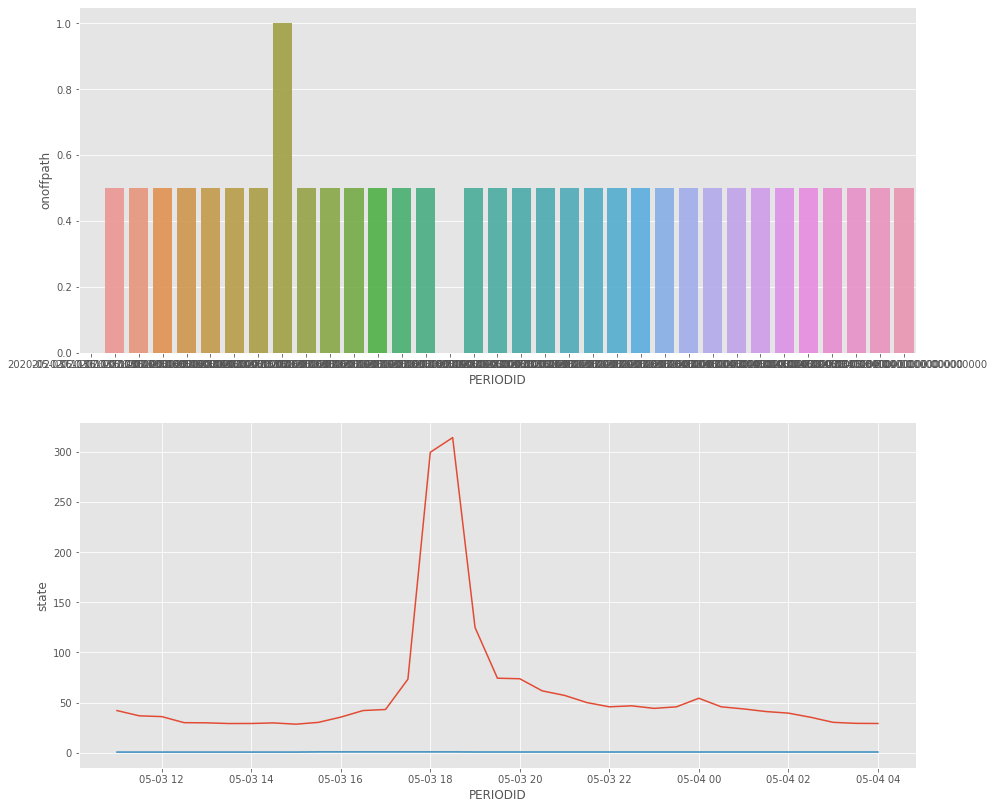

In [1]:
port matplotlib.pyplot as plt
import pandas as pd
from model import Model
from appliance import Appliance
import matplotlib.dates as mdates
import seaborn as sns


## Ramps are now in percentage
## min and max level are also in percentage
app = Appliance(max_load=100, maintain_load=90, max_level=1, min_level=0.5, ramp_up=0.18, ramp_down=0.11)

#start percentage has to be between max and min
#state {NSW1, QLD1, VIC1, SA1, TAS1}
model = Model(start_percentage=0.7, n=1000, app=app, state='SA1')
model.ramp_down


model.run_model()


##plotting Code
cheapest_path_node, index = model.get_cheapest_path_to_level(1,0.7)
timesteps = model.time_steps
df = pd.DataFrame({'time': timesteps,
                   'onoffpath': cheapest_path_node.path,
                   'state': cheapest_path_node.state_value
                   })

price = model.forecast_price.copy()
price = price.reset_index()
df= pd.concat([df, price[['RRP', 'PERIODID']]], axis=1)
df.set_index('PERIODID', inplace=True)
plt.style.use('ggplot')

fig, (ax, ax2) = plt.subplots(figsize = (15,14), nrows=2)
sns.barplot(df.index, df['onoffpath'], alpha=0.9, ax=ax)

sns.lineplot(df.index, df['RRP'], ax=ax2)
sns.lineplot(df.index, df['state'], ax=ax2)
# # df['RRP'].plot(secondary_y=True, ax=ax2)
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
# #set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# # #set ticks every week
# df1 = model.forecast_price
# df1.RRP.plot(secondary_y=True, ax=ax)
# df.state.plot(style='g', ax=ax)